# <font size="5">Importing the libraries</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# <font size="5">Dataset and it's details</font>

In [3]:
file_path = "/mnt/data/Updated_Combined_Dataset.csv"
df = pd.read_csv("Optimized_Dataset.csv")
df


,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time,Completed Date,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency
0,T1,Meeting with clients to gather initial project...,David,Medium,T91,2025-02-28,2025-03-06,6,2025-03-10,4,6,10,0.857143,0.545455
1,T2,Presenting project updates to stakeholders,Charlie,Low,T29,2025-03-12,2025-03-20,8,2025-03-22,2,8,10,0.888889,0.727273
2,T3,Conducting client feedback sessions on prototy...,Eve,Low,T5,2025-03-11,2025-03-15,4,2025-03-17,2,4,6,0.800000,0.571429
3,T4,Aligning project goals with business objective...,Charlie,Medium,T45,2025-02-17,2025-02-23,6,2025-02-26,3,6,9,0.857143,0.600000
4,T5,Negotiating project scope and deliverables wit...,Alice,Medium,No Dependency,2025-02-13,2025-02-19,6,2025-02-24,5,6,11,0.857143,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,T532,Generated task 32 for dataset expansion.,Alice,Low,No Dependency,2025-03-06,2025-03-18,7,2025-03-21,3,12,15,0.538462,0.437500
707,T213,Expanding product offerings based on user demand,Charlie,Low,T78,2025-01-27,2025-02-06,10,2025-02-11,5,10,15,0.909091,0.625000
708,T304,Optimizing power consumption in IoT devices,Eve,Low,T4,2025-02-07,2025-02-17,10,2025-02-14,-3,10,7,0.909091,1.250000
709,T17,Identifying key differentiators for the product,Eve,Low,T83,2025-01-25,2025-02-01,7,2025-02-06,5,7,12,0.875000,0.538462


In [4]:
df.describe()

,Estimated Time,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,6.090014,1.260197,6.272855,7.533052,0.814891,inf
std,3.011770,2.473198,3.209376,4.005449,0.196015,NaN
min,1.000000,-3.000000,1.000000,-2.000000,0.250000,-1.000000
25%,4.000000,-1.000000,4.000000,5.000000,0.750000,0.541958
50%,6.000000,1.000000,6.000000,7.000000,0.857143,0.692308
75%,9.000000,3.000000,9.000000,10.000000,0.888889,1.000000
max,12.000000,5.000000,15.000000,20.000000,2.000000,inf


In [5]:
df.shape

(711, 14)

In [6]:
df.columns

Index(['Task ID', 'Task Description', 'Assigned To', 'Priority',
       'Dependencies', 'Assigned Date', 'Expected Deadline', 'Estimated Time',
       'Completed Date', 'Delay (days)', 'Task Duration', 'Completion Time',
       'Urgency', 'Completion Efficiency'],
      dtype='object')

In [7]:
df.isna().sum()

Task ID                  0
Task Description         0
Assigned To              0
Priority                 0
Dependencies             0
Assigned Date            0
Expected Deadline        0
Estimated Time           0
Completed Date           0
Delay (days)             0
Task Duration            0
Completion Time          0
Urgency                  0
Completion Efficiency    0
dtype: int64

In [8]:
for c in df.columns[2:4]:
    print(c,df[c].unique())
    print("-"*50)

Assigned To ['David' 'Charlie' 'Eve' 'Alice' 'Bob']
--------------------------------------------------
Priority ['Medium' 'Low' 'High']
--------------------------------------------------


In [9]:
tm_count = df['Assigned To'].value_counts().reset_index() 
tm_count.columns = ['Team Members','Task Count'] 
tm_count

,Team Members,Task Count
0,Charlie,173
1,David,153
2,Eve,136
3,Bob,128
4,Alice,121


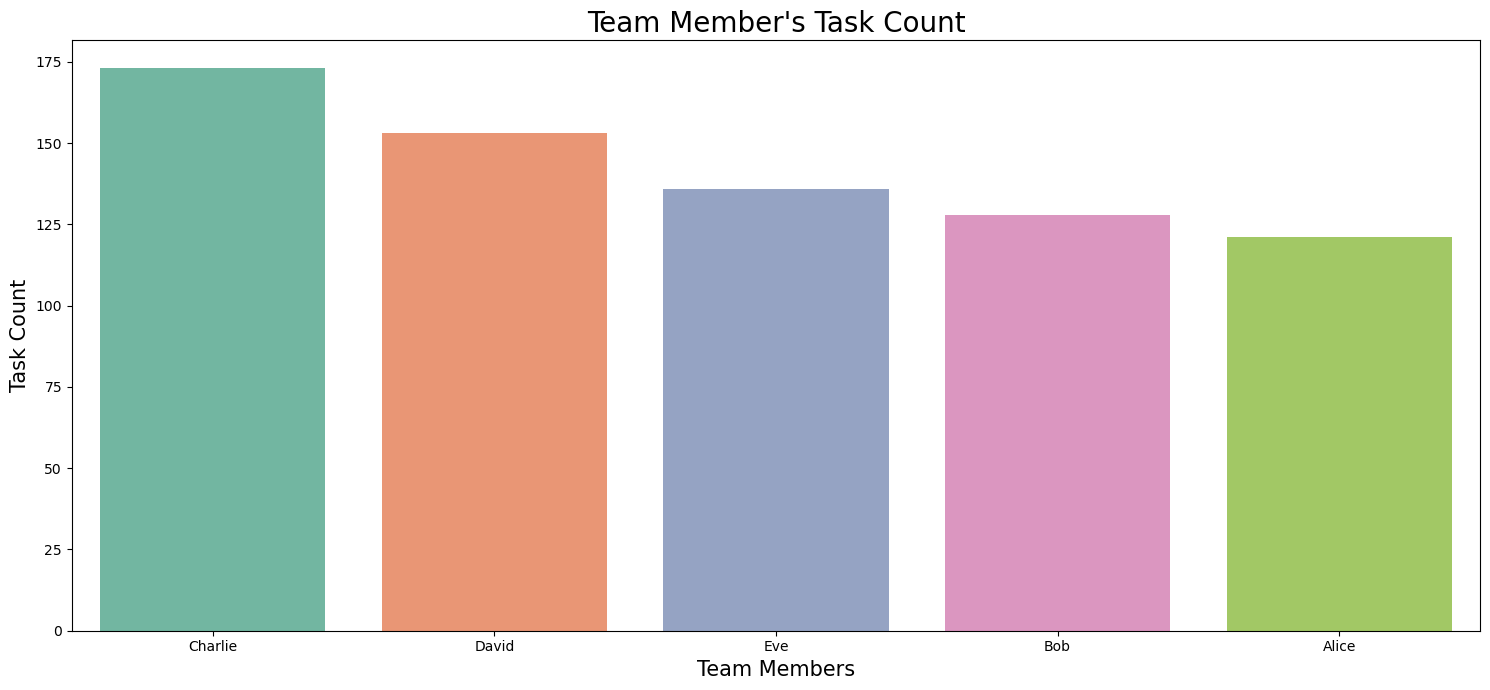

In [10]:
plt.figure(figsize=(15,7)) 
ax=sns.barplot(x="Team Members", y='Task Count', data=tm_count, palette='Set2') 
ax.set_title("Team Member's Task Count", fontsize=20) 
ax.set_xlabel("Team Members", fontsize=15) 
ax.set_ylabel('Task Count', fontsize=15)
plt.tight_layout()
plt.show()

# <font size="5">Unique Values count with their Proportion</font>
## <font size="3">2. Task's Priority</font>

In [11]:
priority_count = df['Priority'].value_counts().reset_index() 
priority_count.columns = ['Priority','Count'] 
priority_count

,Priority,Count
0,Medium,237
1,Low,237
2,High,237


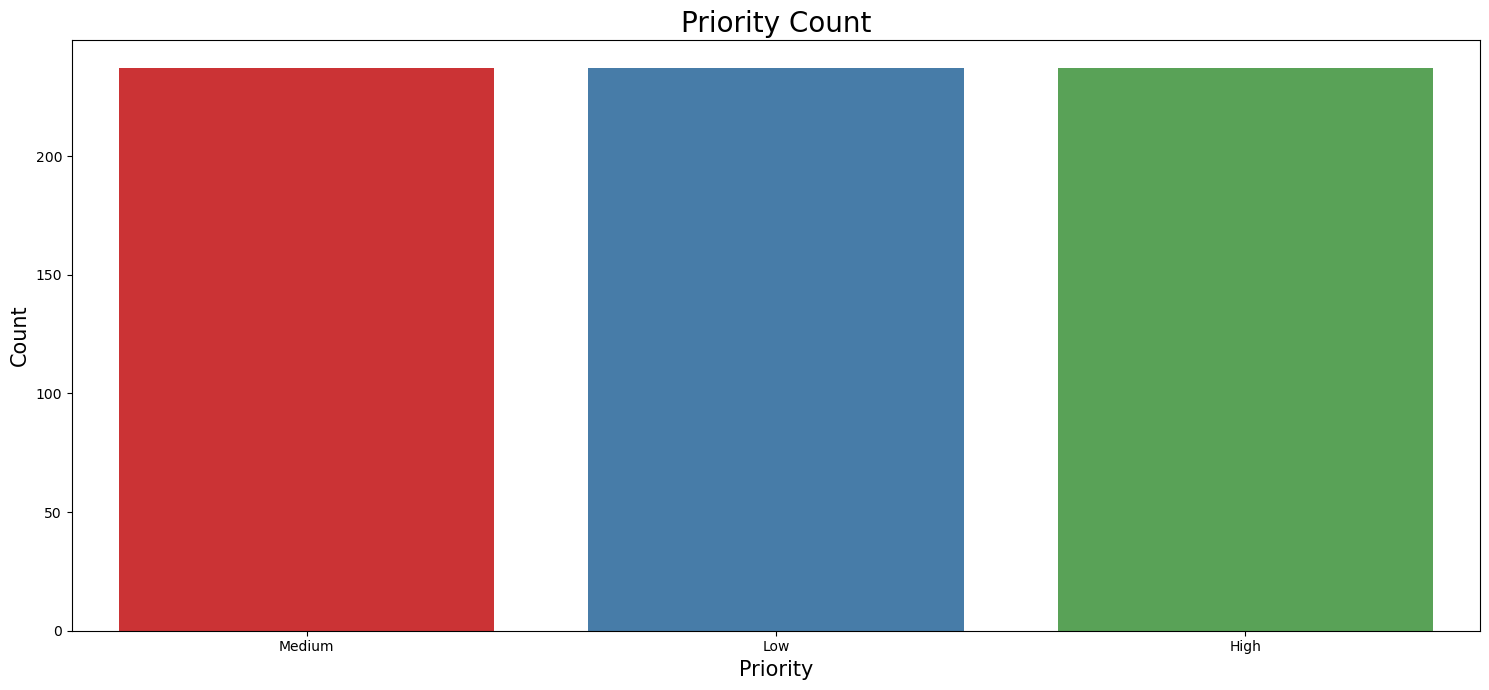

In [12]:
plt.figure(figsize=(15,7)) 
ax=sns.barplot(x="Priority", y='Count', data=priority_count, palette='Set1') 
ax.set_title("Priority Count", fontsize=20) 
ax.set_xlabel("Priority", fontsize=15) 
ax.set_ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

# <font size="5">Plotting the delay of team members on tasks</font>


In [13]:
df_a=df[df['Assigned To'] == 'Alice'].reset_index(drop=True)
df_b=df[df['Assigned To'] == 'Bob'].reset_index(drop=True)
df_c=df[df['Assigned To'] == 'Charlie'].reset_index(drop=True)
df_d=df[df['Assigned To'] == 'David'].reset_index(drop=True)
df_e=df[df['Assigned To'] == 'Eve'].reset_index(drop=True)
df_e

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time,Completed Date,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency
0,T3,Conducting client feedback sessions on prototy...,Eve,Low,T5,2025-03-11,2025-03-15,4,2025-03-17,2,4,6,0.800000,0.571429
1,T6,Gathering user insights through client interviews,Eve,Low,T13,2025-01-27,2025-01-28,1,2025-01-31,3,1,4,0.500000,0.200000
2,T11,Conducting market research to identify industr...,Eve,Medium,T40,2025-02-15,2025-02-20,5,2025-02-22,2,5,7,0.833333,0.625000
3,T17,Identifying key differentiators for the product,Eve,Low,T83,2025-01-25,2025-02-01,7,2025-02-06,5,7,12,0.875000,0.538462
4,T33,Collecting team feedback on wireframe iterations,Eve,Medium,T83,2025-02-04,2025-02-10,6,2025-02-08,-2,6,4,0.857143,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,T120,Documenting lessons learned from past projects,Eve,Low,T43,2025-02-21,2025-03-01,8,2025-02-28,-1,8,7,0.888889,1.000000
132,T210,Brainstorming breakthrough ideas for product d...,Eve,Low,T89,2025-02-04,2025-02-12,8,2025-02-16,4,8,12,0.888889,0.615385
133,T304,Optimizing power consumption in IoT devices,Eve,Low,T4,2025-02-07,2025-02-17,10,2025-02-14,-3,10,7,0.909091,1.250000
134,T17,Identifying key differentiators for the product,Eve,Low,T83,2025-01-25,2025-02-01,7,2025-02-06,5,7,12,0.875000,0.538462


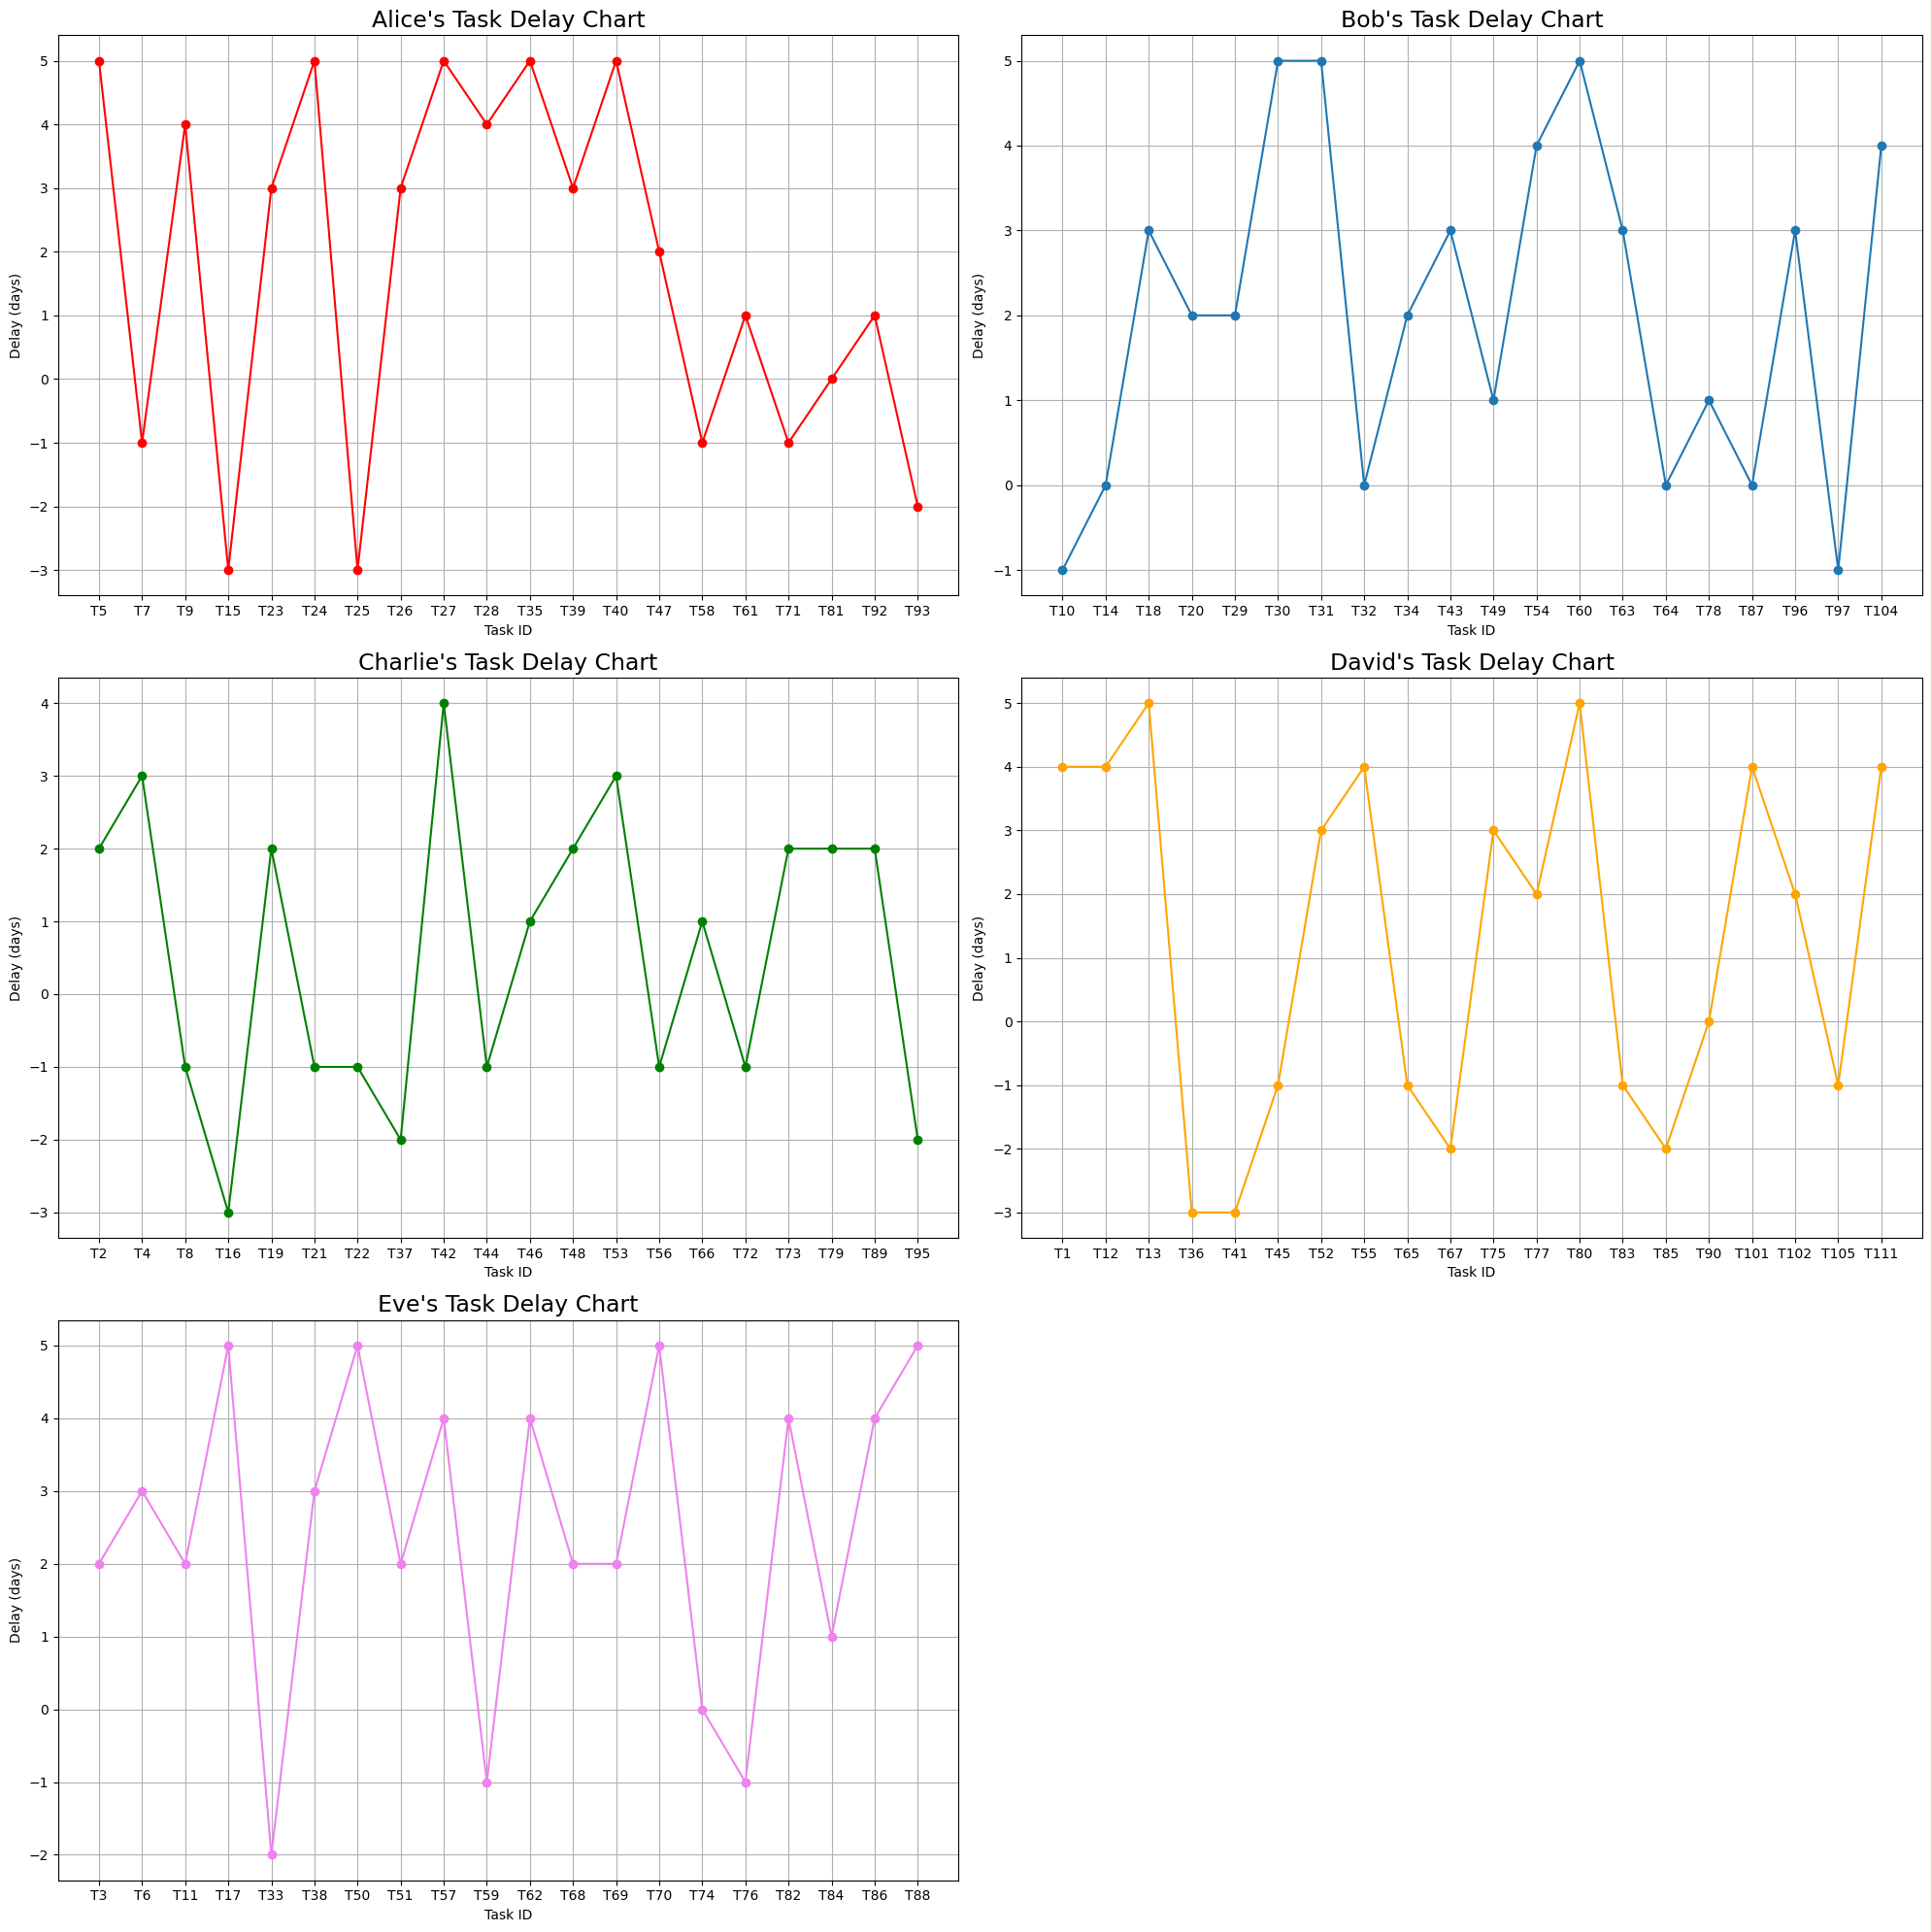

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.plot(df_a["Task ID"].head(20),df_a["Delay (days)"].head(20),marker="o",color='red')
plt.title("Alice's Task Delay Chart",fontsize=17)
plt.xlabel("Task ID",fontsize=10)
plt.ylabel("Delay (days)",fontsize=10)
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(df_b["Task ID"].head(20),df_b["Delay (days)"].head(20),marker='o')
plt.title("Bob's Task Delay Chart",fontsize=17)
plt.xlabel("Task ID",fontsize=10)
plt.ylabel("Delay (days)",fontsize=10)
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(df_c["Task ID"].head(20),df_c["Delay (days)"].head(20),marker="o",color='green')
plt.title("Charlie's Task Delay Chart",fontsize=17)
plt.xlabel("Task ID",fontsize=10)
plt.ylabel("Delay (days)",fontsize=10)
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(df_d["Task ID"].head(20),df_d["Delay (days)"].head(20),marker="o",color='orange')
plt.title("David's Task Delay Chart",fontsize=17)
plt.xlabel("Task ID",fontsize=10)
plt.ylabel("Delay (days)",fontsize=10)
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(df_e["Task ID"].head(20),df_e["Delay (days)"].head(20),marker="o",color='violet')
plt.title("Eve's Task Delay Chart",fontsize=17)
plt.xlabel("Task ID",fontsize=10)
plt.ylabel("Delay (days)",fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()



# <font size="5">Label Encoding</font>
## <font size='3'>Encoding the Values from Categorical value to Numerical Value</font>


In [15]:
label_encoders = {}
categorical_cols = ["Assigned To", "Dependencies"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df["Assigned Date"] = pd.to_datetime(df["Assigned Date"]).astype('int64') // 10**9
df["Expected Deadline"] = pd.to_datetime(df["Expected Deadline"]).astype('int64') // 10**9
df["Completed Date"] = pd.to_datetime(df["Completed Date"]).astype('int64') // 10**9
df

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time,Completed Date,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency
0,T1,Meeting with clients to gather initial project...,3,Medium,41,1740700800,1741219200,6,1741564800,4,6,10,0.857143,0.545455
1,T2,Presenting project updates to stakeholders,2,Low,10,1741737600,1742428800,8,1742601600,2,8,10,0.888889,0.727273
2,T3,Conducting client feedback sessions on prototy...,4,Low,24,1741651200,1741996800,4,1742169600,2,4,6,0.800000,0.571429
3,T4,Aligning project goals with business objective...,2,Medium,20,1739750400,1740268800,6,1740528000,3,6,9,0.857143,0.600000
4,T5,Negotiating project scope and deliverables wit...,0,Medium,0,1739404800,1739923200,6,1740355200,5,6,11,0.857143,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,T532,Generated task 32 for dataset expansion.,0,Low,0,1741219200,1742256000,7,1742515200,3,12,15,0.538462,0.437500
707,T213,Expanding product offerings based on user demand,2,Low,35,1737936000,1738800000,10,1739232000,5,10,15,0.909091,0.625000
708,T304,Optimizing power consumption in IoT devices,4,Low,16,1738886400,1739750400,10,1739491200,-3,10,7,0.909091,1.250000
709,T17,Identifying key differentiators for the product,4,Low,38,1737763200,1738368000,7,1738800000,5,7,12,0.875000,0.538462


In [16]:

priority_encoder = LabelEncoder()
df["Priority"] = priority_encoder.fit_transform(df["Priority"])
df["Task Duration"] = df["Expected Deadline"] - df["Assigned Date"]
df["Completion Time"] = df["Completed Date"] - df["Assigned Date"]
df["Delay Ratio"] = df["Delay (days)"] / (df["Task Duration"] + 1)


df

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time,Completed Date,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency,Delay Ratio
0,T1,Meeting with clients to gather initial project...,3,2,41,1740700800,1741219200,6,1741564800,4,518400,864000,0.857143,0.545455,0.000008
1,T2,Presenting project updates to stakeholders,2,1,10,1741737600,1742428800,8,1742601600,2,691200,864000,0.888889,0.727273,0.000003
2,T3,Conducting client feedback sessions on prototy...,4,1,24,1741651200,1741996800,4,1742169600,2,345600,518400,0.800000,0.571429,0.000006
3,T4,Aligning project goals with business objective...,2,2,20,1739750400,1740268800,6,1740528000,3,518400,777600,0.857143,0.600000,0.000006
4,T5,Negotiating project scope and deliverables wit...,0,2,0,1739404800,1739923200,6,1740355200,5,518400,950400,0.857143,0.500000,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,T532,Generated task 32 for dataset expansion.,0,1,0,1741219200,1742256000,7,1742515200,3,1036800,1296000,0.538462,0.437500,0.000003
707,T213,Expanding product offerings based on user demand,2,1,35,1737936000,1738800000,10,1739232000,5,864000,1296000,0.909091,0.625000,0.000006
708,T304,Optimizing power consumption in IoT devices,4,1,16,1738886400,1739750400,10,1739491200,-3,864000,604800,0.909091,1.250000,-0.000003
709,T17,Identifying key differentiators for the product,4,1,38,1737763200,1738368000,7,1738800000,5,604800,1036800,0.875000,0.538462,0.000008


# <font size="5">Prediction without NLP</font>

In [17]:
features = ["Assigned To", "Dependencies", "Estimated Time", "Delay (days)", "Assigned Date", "Expected Deadline", "Task Duration", "Completion Time", "Delay Ratio"]
X = df[features]
Y = df["Priority"]

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=42)
model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=4, n_estimators=300,
                           random_state=42)

In [20]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0,
       2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1])

In [21]:
cm_gb=confusion_matrix(Y_test,Y_pred)
cm_gb

array([[27,  1, 11],
       [15, 26,  9],
       [23,  8, 23]], dtype=int64)

Text(195.72222222222223, 0.5, 'Actual')

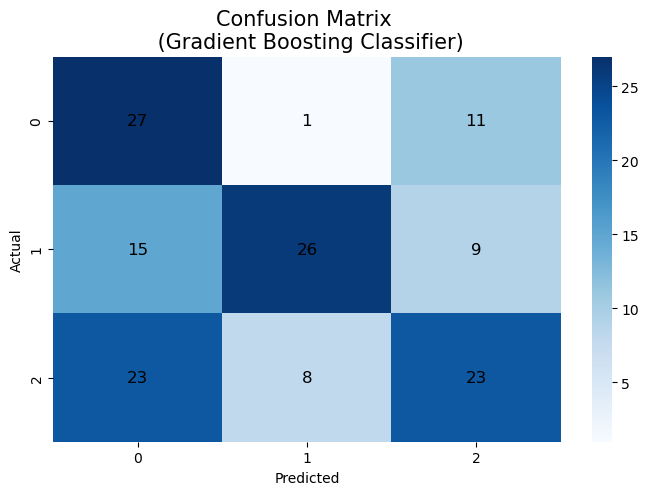

In [22]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_gb, annot=False, fmt='d', cmap='Blues')
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_gb[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix \n (Gradient Boosting Classifier)',fontsize=15)
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)

In [23]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score (Gradient Boosting Classifier): {accuracy * 150:.2f}%")

Accuracy Score (Gradient Boosting Classifier): 79.72%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 79.72%, indicating that it is performing well.</font>

# <font size="5">Prediction with NLP</font>
## <font size="4">Natural Language Processing (NLP) for Task Description</font>


In [24]:
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower().strip())  
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)

df["Preprocessed Task"]=df["Task Description"].apply(preprocess)
df

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time,Completed Date,Delay (days),Task Duration,Completion Time,Urgency,Completion Efficiency,Delay Ratio,Preprocessed Task
0,T1,Meeting with clients to gather initial project...,3,2,41,1740700800,1741219200,6,1741564800,4,518400,864000,0.857143,0.545455,0.000008,meeting client gather initial project requirement
1,T2,Presenting project updates to stakeholders,2,1,10,1741737600,1742428800,8,1742601600,2,691200,864000,0.888889,0.727273,0.000003,presenting project update stakeholder
2,T3,Conducting client feedback sessions on prototy...,4,1,24,1741651200,1741996800,4,1742169600,2,345600,518400,0.800000,0.571429,0.000006,conducting client feedback session prototype d...
3,T4,Aligning project goals with business objective...,2,2,20,1739750400,1740268800,6,1740528000,3,518400,777600,0.857143,0.600000,0.000006,aligning project goal business objective stake...
4,T5,Negotiating project scope and deliverables wit...,0,2,0,1739404800,1739923200,6,1740355200,5,518400,950400,0.857143,0.500000,0.000010,negotiating project scope deliverable client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,T532,Generated task 32 for dataset expansion.,0,1,0,1741219200,1742256000,7,1742515200,3,1036800,1296000,0.538462,0.437500,0.000003,generated task dataset expansion
707,T213,Expanding product offerings based on user demand,2,1,35,1737936000,1738800000,10,1739232000,5,864000,1296000,0.909091,0.625000,0.000006,expanding product offering based user demand
708,T304,Optimizing power consumption in IoT devices,4,1,16,1738886400,1739750400,10,1739491200,-3,864000,604800,0.909091,1.250000,-0.000003,optimizing power consumption iot device
709,T17,Identifying key differentiators for the product,4,1,38,1737763200,1738368000,7,1738800000,5,604800,1036800,0.875000,0.538462,0.000008,identifying key differentiator product


# <font size="5">Implementing TF-IDF Vectorizer on Task Description</font>
## <font size="3"> TF-IDF (Time Frequency-Inverse Document Frequency) is used to find out the importance of a word in a sentence</font>

In [25]:
tfidf=TfidfVectorizer(max_features=5000)
tfidf

TfidfVectorizer(max_features=5000)

In [26]:
#Independent variable and Dependent Variable
x_n=tfidf.fit_transform(df["Preprocessed Task"]).toarray()
y_n=df["Priority"]
y_n

0      2
1      1
2      1
3      2
4      2
      ..
706    1
707    1
708    1
709    1
710    1
Name: Priority, Length: 711, dtype: int32

In [27]:
x_tfidf_df=pd.DataFrame(x_n,columns=tfidf.get_feature_names_out())
x_tfidf_df

,ab,abandonment,academia,acceptance,access,accessibility,accuracy,acquisition,across,actionable,...,webinars,wikis,wireframe,wireframes,within,without,wordofmouth,workflow,working,writing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <font size="5">Train-Test Splitting</font>


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_n,y_n,test_size=0.2,random_state=42)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# <font size="5">Implementing the Models</font>
# <font size="4">1. Random Forest Classifier</font>
<font size="3">A Random Forest is like a group of decision trees working together to make a decision.</font>



In [29]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
prediction=model.predict(x_test)
prediction

array([2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0])

In [31]:
cm_rf=confusion_matrix(y_test,prediction)
cm_rf

array([[27,  2, 10],
       [17, 18, 15],
       [26,  8, 20]], dtype=int64)

Text(195.72222222222223, 0.5, 'Actual')

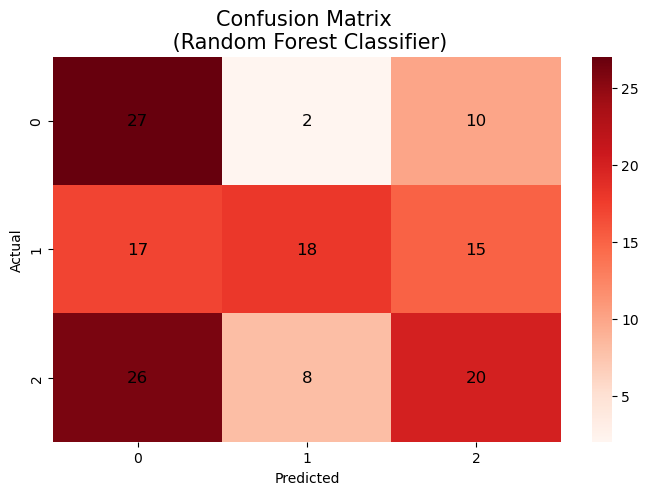

In [32]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_rf, annot=False, fmt='d', cmap='Reds')
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_rf[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix \n (Random Forest Classifier)',fontsize=15)
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)

In [33]:
acc=accuracy_score(y_test,prediction)
print(f"Accuracy Score (Random Forest): {acc*150:.2f}%")


Accuracy Score (Random Forest): 68.18%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 67.13%, indicating that it is average performing.</font>

# <font size="5">Implementing the Models</font>
# <font size="4">2. Multinomial Naive Bayes</font>
<font size="3">Multinomial Naive Bayes is a simple yet effective algorithm often used for text classification.</font>


In [34]:
#2. Naive Bayes

nb_model=MultinomialNB()
nb_model

MultinomialNB()

In [35]:
nb_model.fit(x_train,y_train)

MultinomialNB()

In [36]:
nb_pred=nb_model.predict(x_test)
nb_pred

array([2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0])

In [37]:
cm_nb=confusion_matrix(y_test,nb_pred)
cm_nb

array([[20,  9, 10],
       [21, 20,  9],
       [19, 16, 19]], dtype=int64)

Text(195.72222222222223, 0.5, 'Actual')

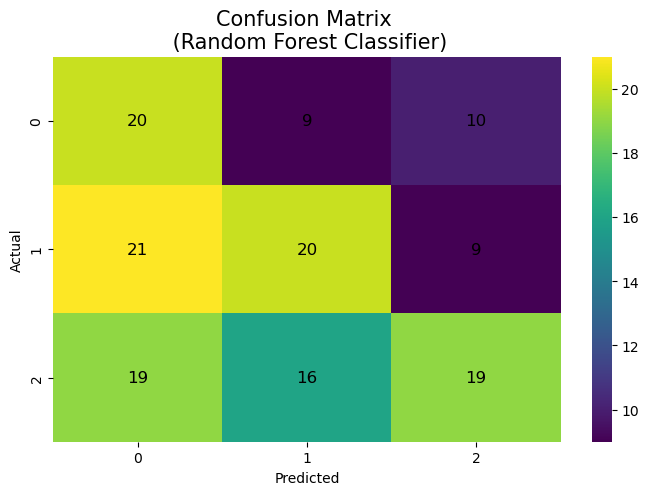

In [38]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_nb, annot=False, fmt='d', cmap='viridis')
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_nb[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix \n (Random Forest Classifier)',fontsize=15)
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)

In [39]:
acn=accuracy_score(y_test,nb_pred)
print(f"Accuracy Score (Multinomial Naive Bayes): {acn*150:.2f}%")

Accuracy Score (Multinomial Naive Bayes): 61.89%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 61.89%, indicating that it is average performing.</font>

# <font size="5">Implementing the Models</font>
# <font size="4">3. Gradient Boosting Classifier</font>
<font size="3">Gradient Boosting Classifier (GBC) is a powerful machine learning algorithm used for classification tasks, meaning it helps predict categories or labels like "High", "Medium", or "Low" priority.</font>


In [40]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=4, n_estimators=300,
                           random_state=42)

In [41]:
gb_pred = model.predict(x_test)
gb_pred

array([2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0])

In [42]:
cm_gb=confusion_matrix(y_test,gb_pred)
cm_gb

array([[24,  5, 10],
       [17, 20, 13],
       [20, 11, 23]], dtype=int64)

Text(195.72222222222223, 0.5, 'Actual')

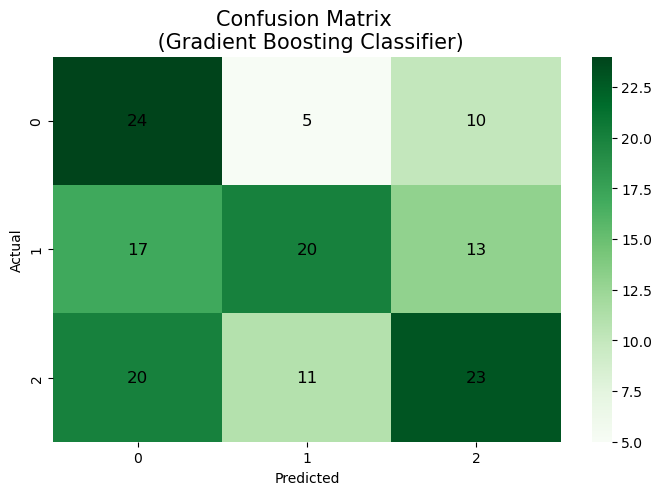

In [43]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_gb, annot=False, fmt='d', cmap='Greens')
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_gb[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix \n (Gradient Boosting Classifier)',fontsize=15)
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)

In [44]:
accuracy = accuracy_score(y_test, gb_pred)
print(f"Accuracy Score (Gradient Boosting Classifier): {accuracy * 150:.2f}%")

Accuracy Score (Gradient Boosting Classifier): 70.28%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 70.28%, indicating that it is performing well.</font>

In [46]:
import pickle
file = open('task_model.pkl', 'wb')
pickle.dump(model, file)